In [3]:
import pandas as pd
import random
import numpy as np
from faker import Faker

# Initialize Faker and random seed
fake = Faker()
random.seed(42)
np.random.seed(42)

# Define platforms and keywords
platforms = ['Facebook', 'Instagram', 'WhatsApp', 'Website']
keywords = ['loan approval', 'customer service', 'interest rates', 'account balance', 'payment issues', 'application status']

# Generate synthetic data
num_rows = 1000
data = {
    'Platform': [random.choice(platforms) for _ in range(num_rows)],
    'Date': [fake.date_between(start_date='-30d', end_date='today') for _ in range(num_rows)],
    'Customer_ID': [fake.uuid4() for _ in range(num_rows)],
    'Message_Content': [fake.sentence(nb_words=10) for _ in range(num_rows)],
    'Sentiment_Score': [round(random.uniform(-1, 1), 2) for _ in range(num_rows)],
    'Keywords': [random.choice(keywords) for _ in range(num_rows)]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('synthetic_sentiment_data.csv', index=False)

print("Synthetic data generated and saved as 'synthetic_sentiment_data.csv'.")

Synthetic data generated and saved as 'synthetic_sentiment_data.csv'.


In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('synthetic_sentiment_data.csv')

# Preview the data
print(df.head())

    Platform        Date                           Customer_ID  \
0   Facebook  2025-08-08  d6d84ce7-78fb-47e3-a3c3-6055446d73bf   
1   Facebook  2025-08-12  76eb9298-53c8-497e-a302-f7fc7392bef3   
2   WhatsApp  2025-08-09  11be33d5-3dd6-4692-8739-f6d1379253ca   
3  Instagram  2025-08-11  f6e8dedb-753f-44cc-9d5e-9d86c47445e3   
4  Instagram  2025-07-24  66f4a19d-31a9-48b9-a71e-c6c35f30221e   

                                     Message_Content  Sentiment_Score  \
0  Together its election age save whom authority ...            -0.82   
1  Down Democrat nothing easy sell Congress reaso...            -0.58   
2  Never common side realize our majority outside...             0.28   
3  Research same effort world success interest le...             0.94   
4  Sit public type specific person threat more co...            -0.90   

             Keywords  
0      payment issues  
1     account balance  
2       loan approval  
3      interest rates  
4  application status  


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         1000 non-null   object 
 1   Date             1000 non-null   object 
 2   Customer_ID      1000 non-null   object 
 3   Message_Content  1000 non-null   object 
 4   Sentiment_Score  1000 non-null   float64
 5   Keywords         1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [3]:
df.describe()

,Sentiment_Score
count,1000.000000
mean,0.004210
std,0.568409
min,-1.000000
25%,-0.470000
50%,-0.010000
75%,0.472500
max,1.000000


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df['Sentiment_Category'] = pd.cut(
       df['Sentiment_Score'], 
       bins=[-1, -0.1, 0.1, 1], 
       labels=['Negative', 'Neutral', 'Positive']
   )

In [6]:
sentiment_trends = df.groupby('Date')['Sentiment_Score'].mean().reset_index()

In [7]:
platform_comparison = df.groupby('Platform')['Sentiment_Score'].mean().reset_index()

In [8]:
sentiment_distribution = df['Sentiment_Category'].value_counts()

In [9]:
keyword_counts = df['Keywords'].value_counts()

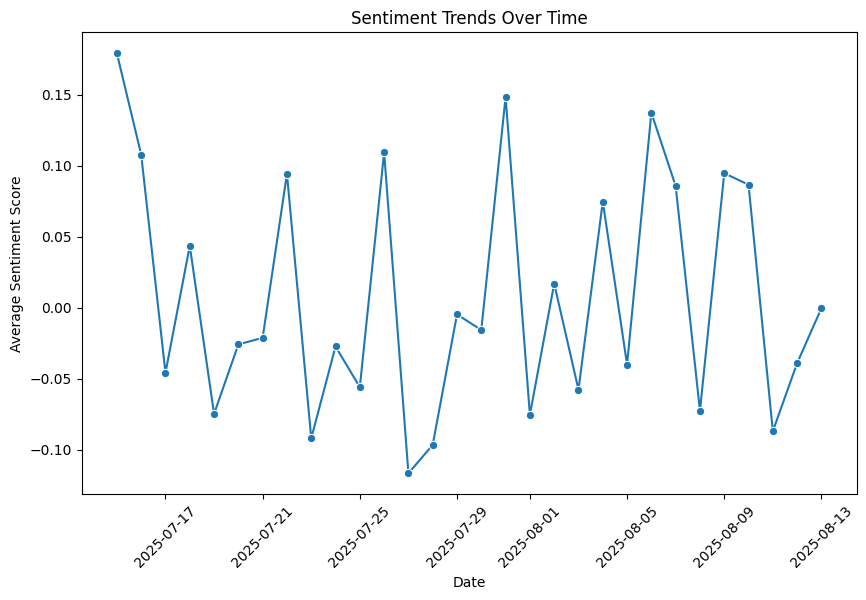

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=sentiment_trends, x='Date', y='Sentiment_Score', marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()

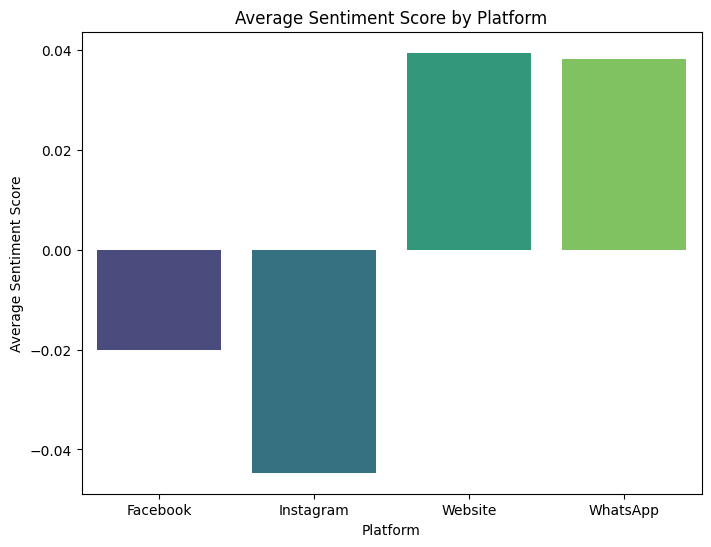

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(data=platform_comparison, x='Platform', y='Sentiment_Score', palette='viridis')
plt.title('Average Sentiment Score by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Sentiment Score')
plt.show()

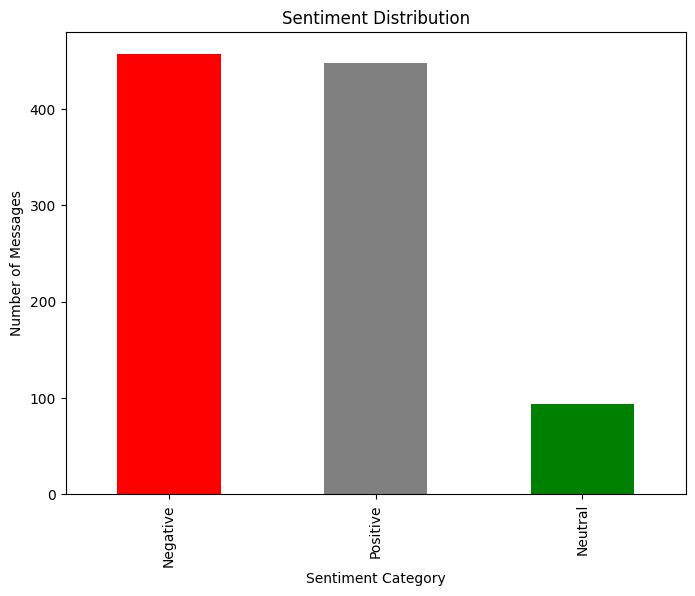

In [12]:
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Messages')
plt.show()

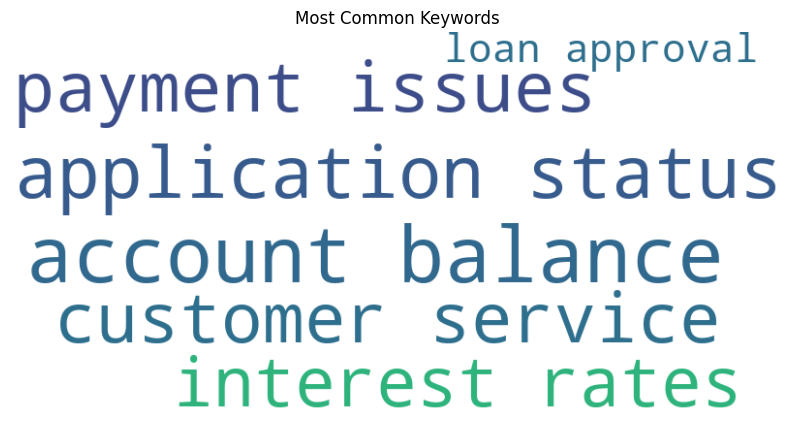

In [15]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Keywords')
plt.show()

In [16]:
instagram_data = df[df['Platform'] == 'Instagram']

In [18]:
launch_date = pd.to_datetime('2025-08-01')
df['Is_Launch_Period'] = df['Date'].apply(
    lambda x: 'Launch' if x == launch_date else 'Pre-Launch' if x < launch_date else 'Post-Launch'
)

In [19]:
negative_sentiments = df[df['Sentiment_Category'] == 'Negative']

In [20]:
negative_sentiments.to_csv('negative_sentiments_instagram.csv', index=False)